# Quality Demo - New Product Analysis

This script analyzes product packaging images, conducting quality assessemnt by detecting packaging text and comparing it to the correct text drawn from the ground truth file. This set of images consists of three products, with a front and back side for each one.

Currently this script runs on the "springroll" product packaging images. This can be changed to "samosa" or "platter" in the **Choose Files** sections.

The trame-texts being used here for comparison are mockups created before we knew what the actual trame-text files would look like. Now that we've seen the actual format of the trame-text files, we'll need to adjust our code.  

In [1]:
from datetime import datetime

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from PIL import ImageOps

from quality_functions import iterate_detect_text
from quality_functions import annotate_image
from quality_functions import overlap
from quality_functions import visualize

## Functions
These functions load two trame text files to combine them into one list of words (get_trame_words) and run the Google API iteratively over both images (front and back), outputting one combines dictionary of annotated words.

The reason that these functions are in this script, rather than in the **quality_functions.py** script with all the other functions is that these two will likeley need to be changed based on what final version and format of images and trame-text files. The other functions should (hopefully) still work no matter the format.

In [2]:
def get_trame_words(trame_text_list):
    trame_words = []
    
    for trame in trame_text_list:
        with open(trame, encoding='latin-1') as file:  
            trame_text = file.read() 
            
        trame_text = trame_text.replace('\n',' ')
        trame_list = trame_text.split(' ')
        
        trame_words += trame_list
        
    return trame_words 

In [3]:
def scan_images(image_list):

    all_annotations = {}
    
    for image_file in image_list:
        # Detect and grey out text on image, iterating until no new text is detected
        annotations = iterate_detect_text(image_file) 
        
        # Visualize greyed out detected text
        annotate_image(image_file, annotations, image_file.split('.')[0]+'_greyed_out.png', 1, (150,150,150), -1, 1)
    
        all_annotations[image_file] = annotations
        
    return all_annotations

## Choose Files

In [4]:
##########################################################
'''Set up variables'''
### Set up image files to examine
front_image = 'platter_front.png'
back_image =  'platter_back.png'

### Set trame-text files to use for comparison
trame_file = 'image_text_files/platter_image_text.txt'

##########################################################

## Call scan_images
Returns a dictionary of all detected text (key is location coordinates, value is string detected).

In [5]:
all_annotations = scan_images([front_image,back_image])

Examining image platter_front.png
Starting Text Detection

Text detected:
PLATEAL, DECOLVERTE, 4, Nems, au, ρ。rc, ., 4, Samoussas, au, boeuf, ., 4, Long, Pao, au, ρ。ulet, ONTDEKKINGSBORD, 4, Nems, met, varkensvlees, ., 4, Samossa, met, rundvlees, ., 4, Long, Pao, met, k1ρρenvlees, TASTA, 1, Sauce, Nuoc, mâm, 1, Nuoc, mam-saus, 1, Sauce, Aigre-douce, 1Zoetzure-saus, 12, min, 85g, 810, kJ, 194, kcal, 10, %, Saveurs, O'ASIE, Saveurs, O'ASIE, des, AR, /van, de, RI, Pour, /Per, 100, g:, 953, kJ, (228, kcal), 

Text detected:
Suggestion, de, présentation/Serveertip, 

Text detected:
x12, /A, PO, 

Text detected:
url, Per, 

Text detected:


-------------------------
No more text identified on iteration #5

Number of text instances recognized per iteration:
[71, 3, 3, 2, 0]
Examining image platter_back.png
Starting Text Detection

Text detected:
O, Assortiment, Asiatique, Nems, au, porc, Samo, ssas, au, b, e, f, -, Long, Pao, au, poulet, Sauces, uoc, mam, et, Agre, -, douce, ., Nems, au, porc

## Load Trame Text Files

In [6]:
trame_words = get_trame_words([trame_file])

## Create List of Detected Words
In this script, results are only based on whether words were detected or not, rather than their order or location. This means we don't actually need the information in the all_annotations dictionary. We just need the text not the coordinates.

A more advanced solution would make use of both the text and the coordinates.

In [7]:
detected_words = [value for annotation_dict in all_annotations.values() for value in annotation_dict.values()]

## Calculate Results

In [8]:
results = overlap(trame_words,detected_words)

--------------------------------------------------------
Number of words in reference text
948
Number of words detected
986
--------------------------------------------------------
Number of words in reference text and detected list:
693
Number of words in reference text but NOT detected:
255
Number of words detected but NOT in reference text:
293
Number of words in only one of the lists:
548
--------------------------------------------------------
Proportion of reference text words detected:
0.7310126582278481

Proportion of detected words in reference text:
0.7028397565922921
--------------------------------------------------------


## Print Most Important Result
For now, the main success metric we're looking for is the percentage of words that are supposed to be on the packaging (reference text words) that are actually detected on the packaging (detected words).

Keep in mind that errors are introduced here when not all the words on the packaging are detected. What this 73.1% really reveals here is the shortcomings of the OCR, rather than package errors. The ideal solution would of course detect all words so that if words were not detected on the packaging we would know it mean they were actually missing.

In [9]:
# Print results
print()
print('Percentage of trame text words detected:')
print(round((results[2]*100),2),'%')
print()


Percentage of trame text words detected:
73.1 %



## Visualize Results
For each image (the front image and the back image) two visualizations are created:
+ The detected words placed on the packaging image
+ The detected words on a white background

In [10]:
fronts = visualize(front_image,all_annotations[front_image],'blue')
backs = visualize(back_image,all_annotations[back_image],'blue')

### Text on Image

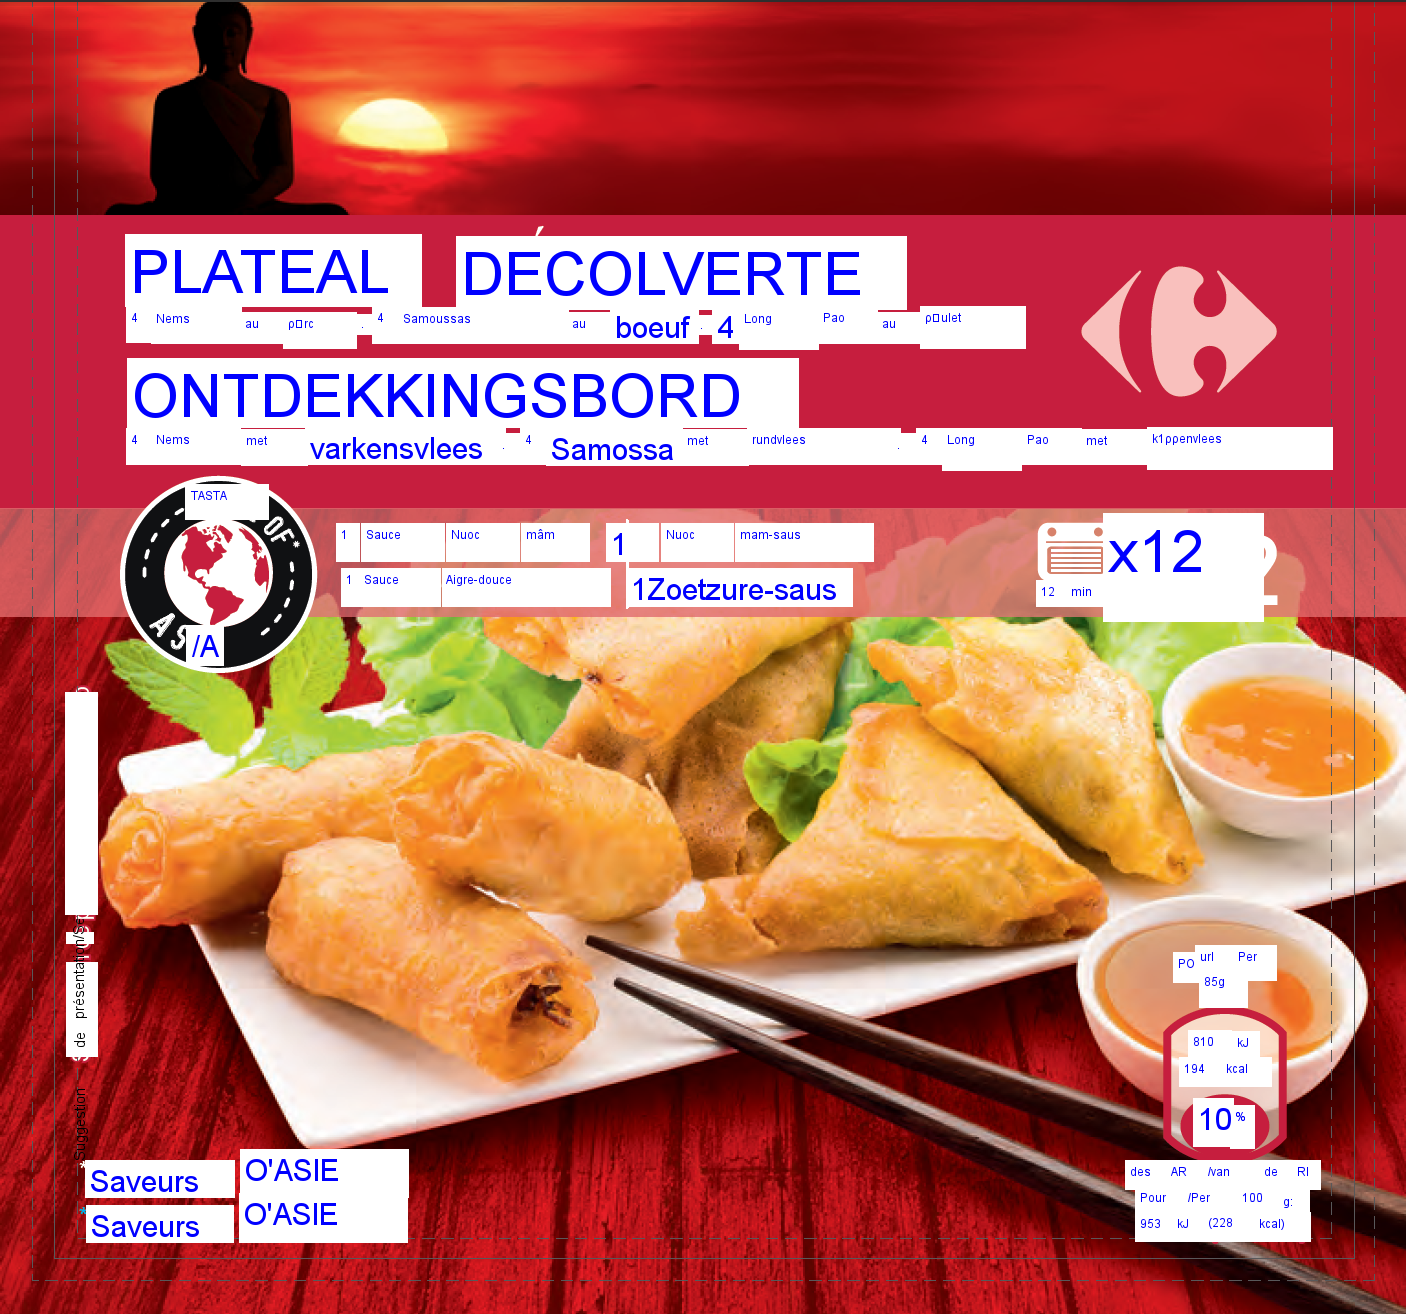

In [11]:
from IPython.display import Image 
Image(fronts[0])

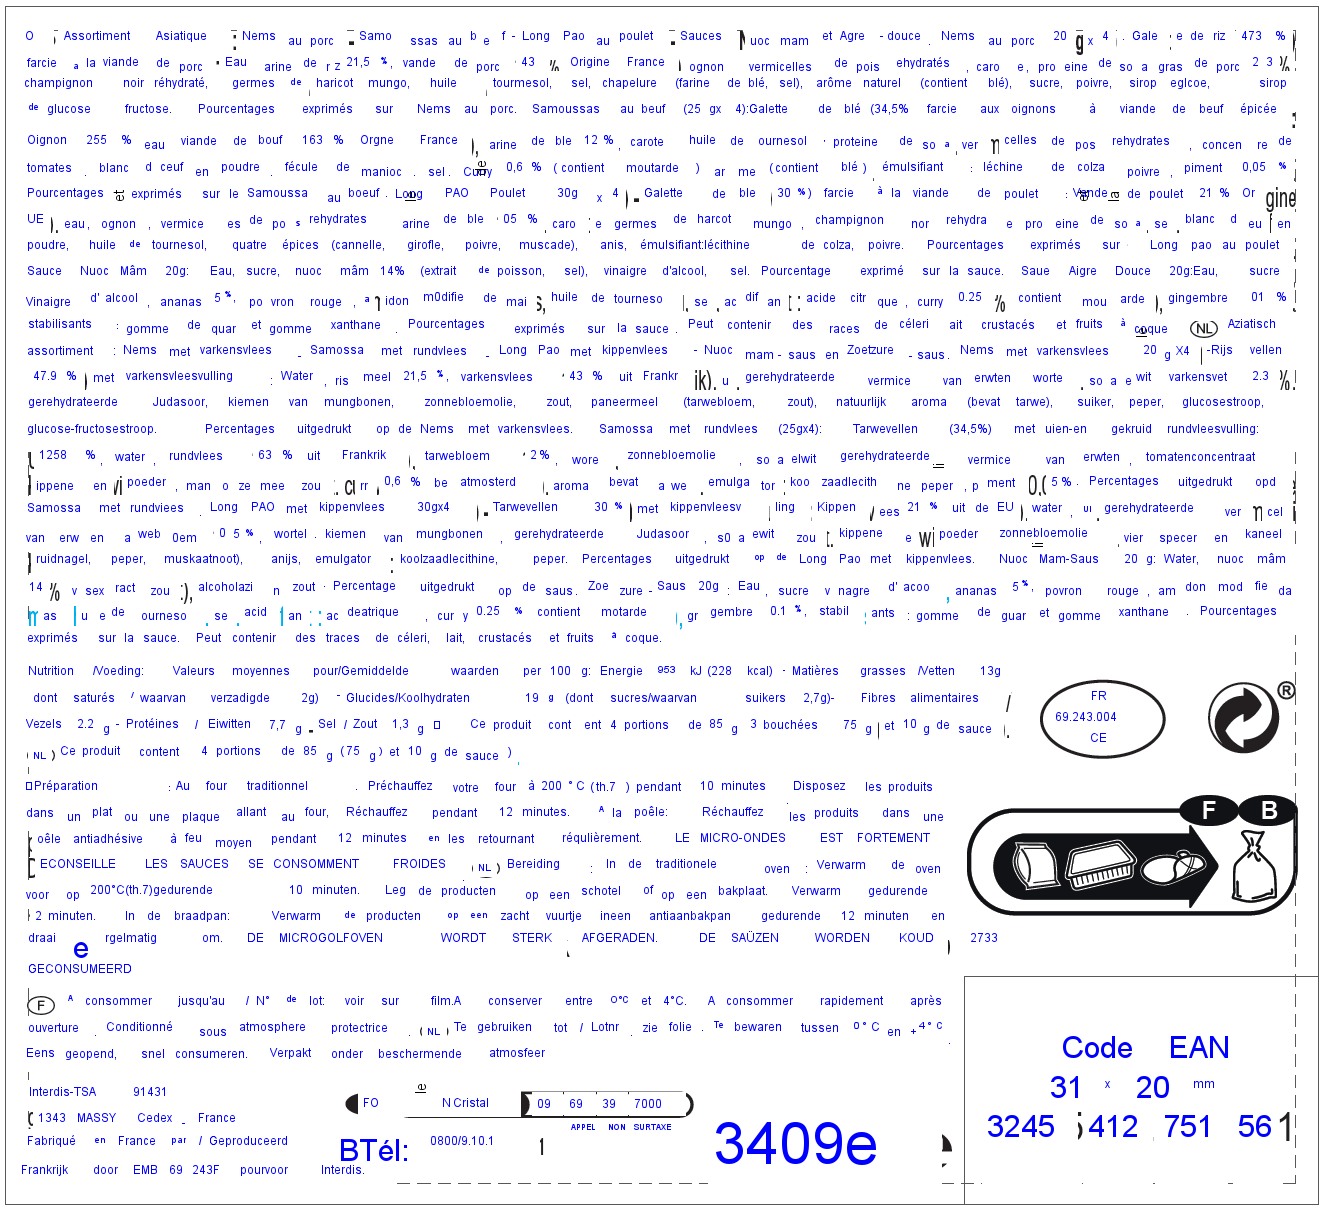

In [12]:
Image(backs[0])

### Text on Blank Background

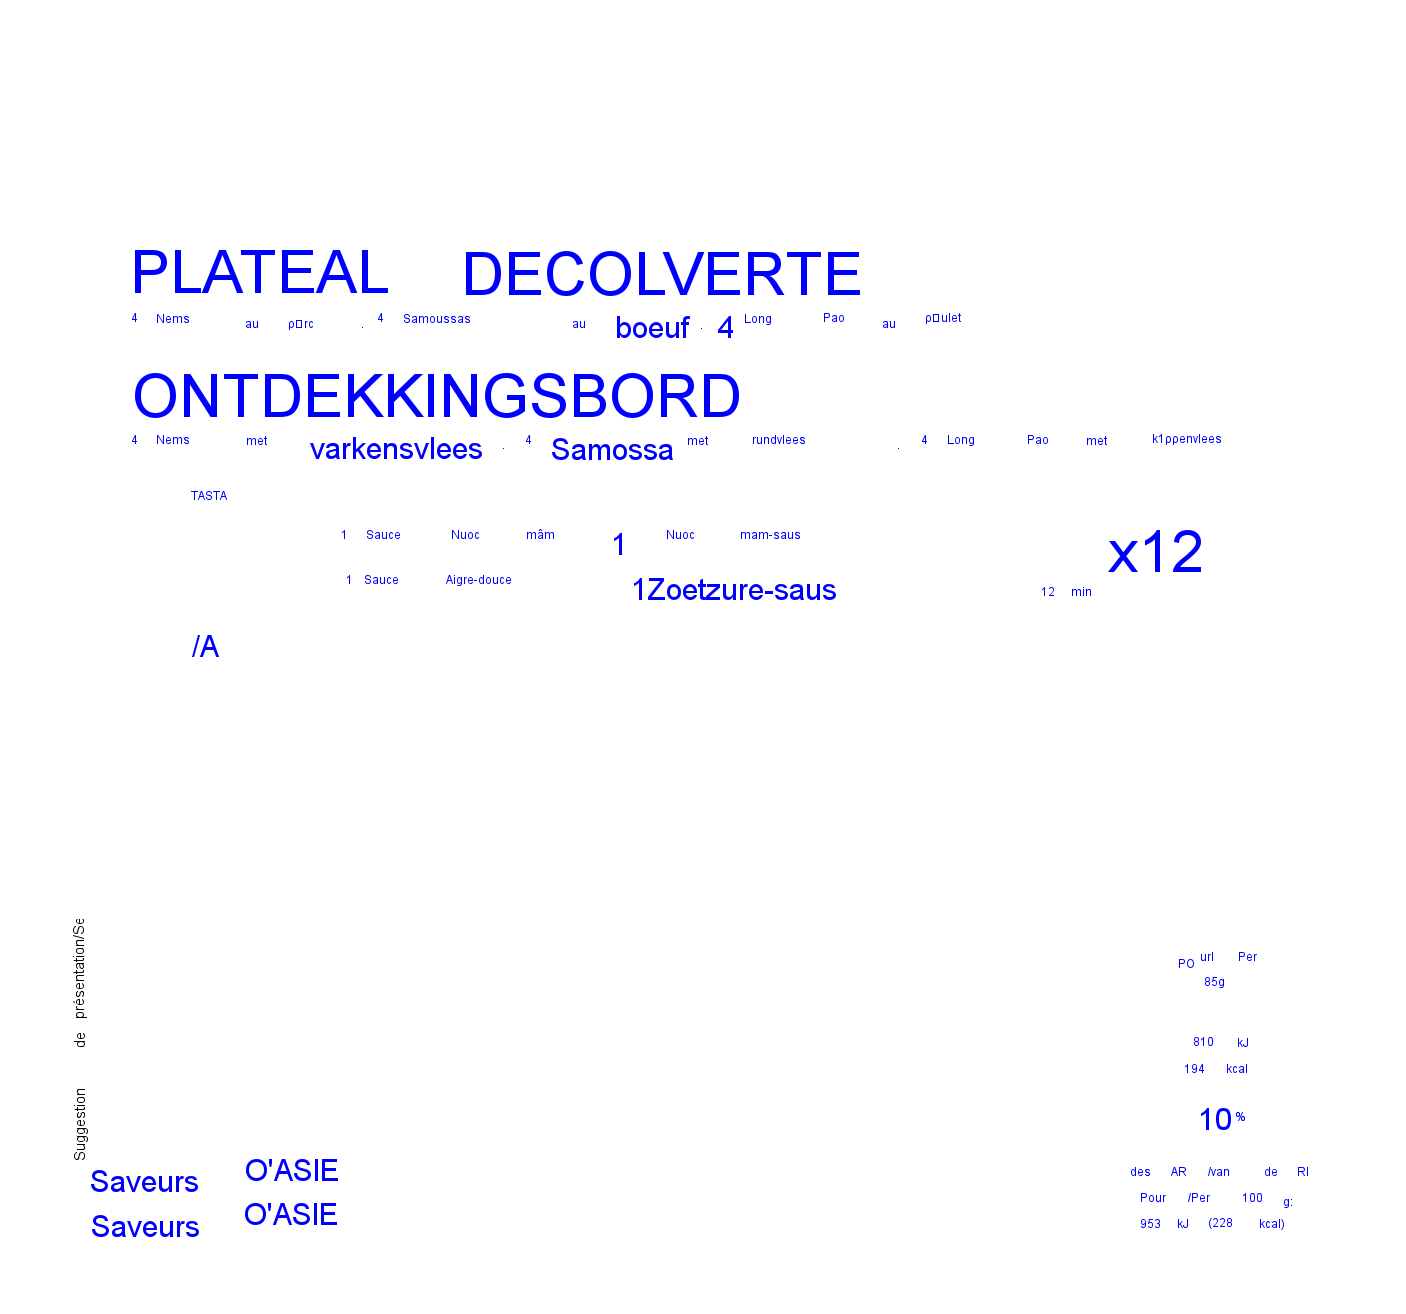

In [13]:
from IPython.display import Image 
Image(fronts[1])

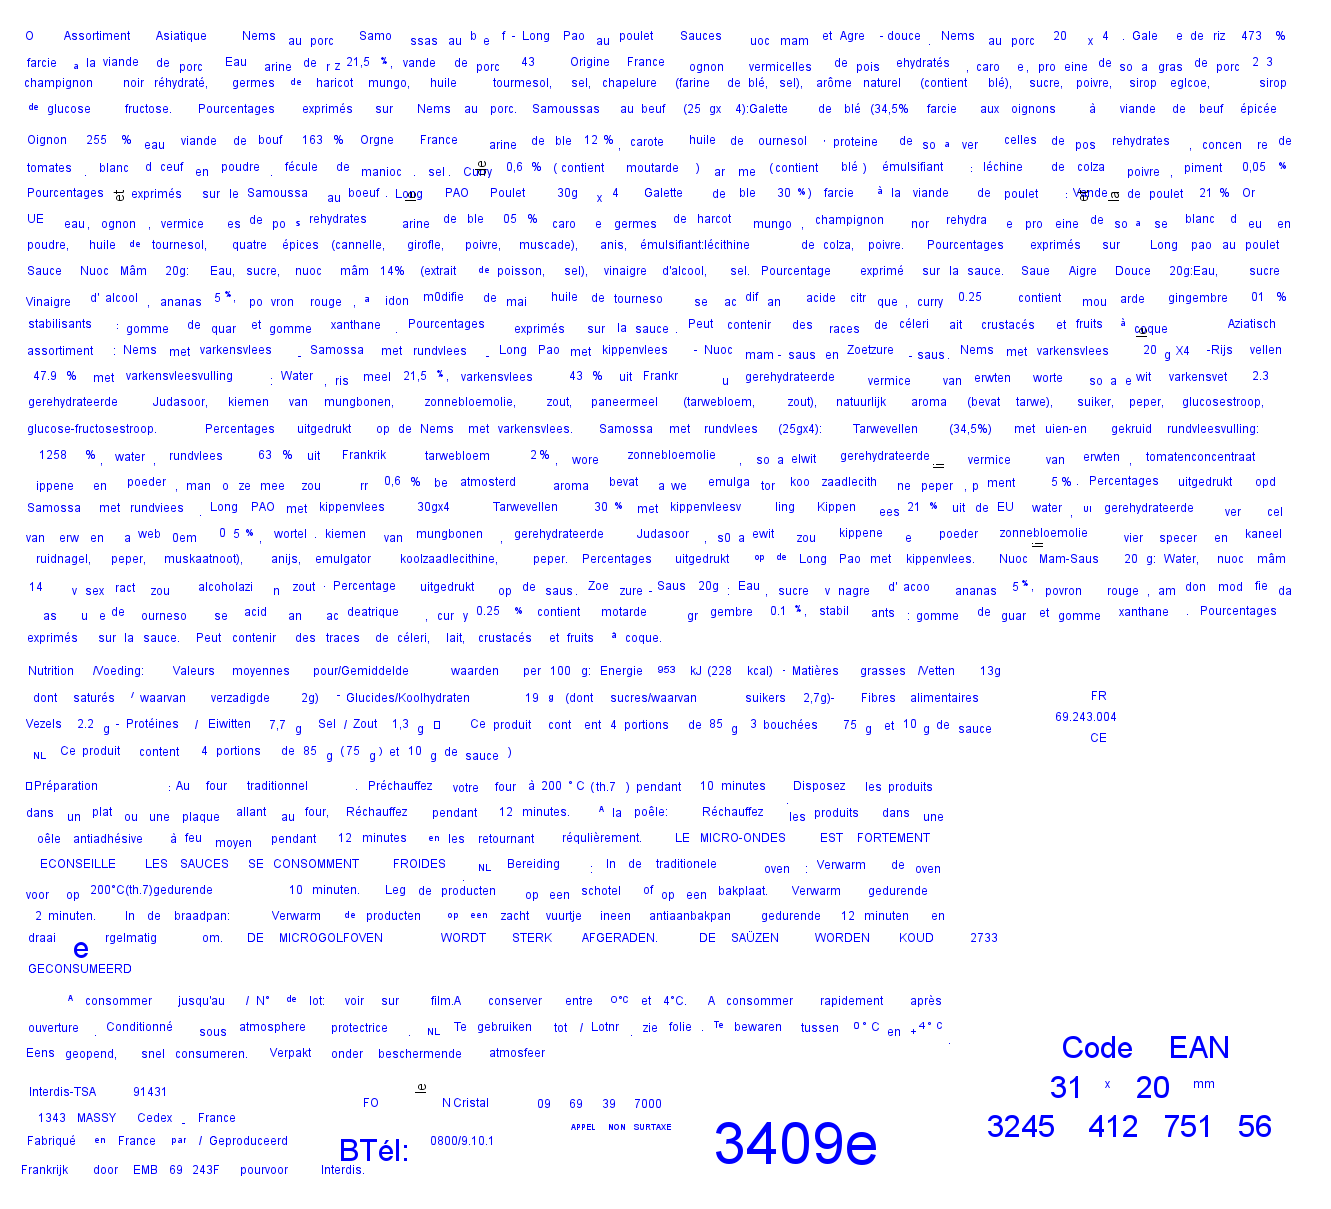

In [15]:
from IPython.display import Image 
Image(backs[1])